### Import Main Libraries

In [1]:
# Pre Processing 
import pandas as pd
import datetime as dt
import numpy as np

# Exploratory Data
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

# Pycaret Environment
from pycaret.classification import *
from pycaret.classification import setup

### Load Marketing Campaign Dataset

In [2]:
Camp = pd.read_csv('marketing_campaign.csv',sep = ";")
pd.set_option('display.max_columns', None)
Camp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Dataset Profiling

In [3]:
def dataset_profile(csv):
    print("Dataset dimension :", csv.ndim)
    print("Dataset shape :", csv.shape)
    print("Dataset size :", csv.size)

dataset_profile(Camp)

Dataset dimension : 2
Dataset shape : (2240, 29)
Dataset size : 64960


In [4]:
def features_types(csv):
    types = csv.dtypes.reset_index()
    types.columns = ['Features','Data Type']
    return types

features_types(Camp)

,Features,Data Type
0,ID,int64
1,Year_Birth,int64
2,Education,object
3,Marital_Status,object
4,Income,float64
5,Kidhome,int64
6,Teenhome,int64
7,Dt_Customer,object
8,Recency,int64
9,MntWines,int64


### Dataset Inspection

### Mising Values Checking

In [5]:
missing_data = Camp.isnull().sum().reset_index()
missing_data.columns = ['Features','Missing Values']
blank_data = Camp.apply(lambda x : x == '.').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(missing_data, blank_data, on=['Features'])
merged_data['Filling Factor'] = (Camp.shape[0]-missing_data['Missing Values'] + Camp.shape[0]-blank_data['Blank Values'])/Camp.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending=True)

,Features,Missing Values,Blank Values,Filling Factor
4,Income,24,0,99.464286
0,ID,0,0,100.000000
26,Z_CostContact,0,0,100.000000
25,Complain,0,0,100.000000
24,AcceptedCmp2,0,0,100.000000
23,AcceptedCmp1,0,0,100.000000
22,AcceptedCmp5,0,0,100.000000
21,AcceptedCmp4,0,0,100.000000
20,AcceptedCmp3,0,0,100.000000
19,NumWebVisitsMonth,0,0,100.000000


### Overview of Dataset

In [6]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
initial_eda(Camp)

Dimensions : 2240 rows, 29 columns
Total NA Values : 24 
                           Column Name  Data Type      #Distinct  NA Values
                                    ID      int64         2240          0
                            Year_Birth      int64           59          0
                             Education     object            5          0
                        Marital_Status     object            8          0
                                Income    float64         1974         24
                               Kidhome      int64            3          0
                              Teenhome      int64            3          0
                           Dt_Customer     object          663          0
                               Recency      int64          100          0
                              MntWines      int64          776          0
                             MntFruits      int64          158          0
                       MntMeatProducts      int64    

### Categorical Features

In [7]:
categorical = [var for var in Camp.columns if Camp[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['Education', 'Marital_Status', 'Dt_Customer']


### Numerical Features

In [8]:
numerical = [var for var in Camp.columns if Camp[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 26 numerical variables

The numerical variables are :

 ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### Categorical Distinct Values

In [9]:
for var in categorical: 
    jumlah1 = len(Camp[var].unique())
    print(f'There are', jumlah1,'unique values in')
    print(f'Count of each values are:','\n', Camp[var].value_counts(),'\n')

There are 5 unique values in
Count of each values are: 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 

There are 8 unique values in
Count of each values are: 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

There are 663 unique values in
Count of each values are: 
 2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64 



### Categorical Values Anomaly Checking

In [10]:
for var in categorical: 
    print(Camp[var].loc[Camp[var].str.contains(',|%|@|!|#|`',na=False)])
    jumlah = Camp[var].str.contains(',|%|@|!|#|&|`',na=False).sum()
    print('There are {} abnormal values\n'.format(jumlah))

Series([], Name: Education, dtype: object)
There are 0 abnormal values

Series([], Name: Marital_Status, dtype: object)
There are 0 abnormal values

Series([], Name: Dt_Customer, dtype: object)
There are 0 abnormal values



### Data Cleaning

### `Income` Feature Missing Value Handling

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])
# Fit to Dataframe
array_prepared = preprocessor.fit_transform(Camp)

# Converts the array to Dataframe
my_cols = numerical + categorical
Camp = pd.DataFrame(array_prepared, 
             columns=(list(my_cols)))

# Replace Features type to Their Correct Ones
Camp[numerical] = Camp[numerical].astype('int64')
Camp

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
0,5524,1957,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Graduation,Single,2012-09-04
1,2174,1954,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Graduation,Single,2014-03-08
2,4141,1965,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Graduation,Together,2013-08-21
3,6182,1984,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Graduation,Together,2014-02-10
4,5324,1981,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,PhD,Married,2014-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,Graduation,Married,2013-06-13
2236,4001,1946,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,PhD,Together,2014-06-10
2237,7270,1981,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,Graduation,Divorced,2014-01-25
2238,8235,1956,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,Master,Together,2014-01-24


### Cross Checking Missing Values with ASSERT Statement

In [12]:
# Assert that there are no missing values in the dataframe
assert pd.notnull(Camp).all().all()
initial_eda(Camp)

Dimensions : 2240 rows, 29 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                    ID      int64         2240          0
                            Year_Birth      int64           59          0
                                Income      int64         1975          0
                               Kidhome      int64            3          0
                              Teenhome      int64            3          0
                               Recency      int64          100          0
                              MntWines      int64          776          0
                             MntFruits      int64          158          0
                       MntMeatProducts      int64          558          0
                       MntFishProducts      int64          182          0
                      MntSweetProducts      int64          177          0
                          MntGoldProds      int64     

### Feature Engineering

### `Education` and `Marital-Status` Feature Handling

In [13]:
# Replace value of Education
Camp['Education'] = Camp['Education'].replace(["2n Cycle","Master"],"Masters")
Camp['Education'] = Camp['Education'].replace(["Graduation"],"Bachelor")
print(f'Unique in Education column became shortened into:', Camp['Education'].unique())
print('\n')

# Replace value of Education
Camp['Marital_Status'] = Camp['Marital_Status'].replace(["Together","Married"],"Married")
Camp['Marital_Status'] = Camp['Marital_Status'].replace(["Divorced","Widow","Alone","Absurd","YOLO"],"Single")
print(f'Unique in Marital Status column became shortened into:', Camp['Marital_Status'].unique())
print('\n')

Unique in Education column became shortened into: ['Bachelor' 'PhD' 'Masters' 'Basic']


Unique in Marital Status column became shortened into: ['Single' 'Married']




### `Dt-Customer` Feature Transformation : Date

In [14]:
Camp['Dt_Customer'] = pd.to_datetime(Camp['Dt_Customer'])
print(Camp['Dt_Customer'].dtypes, '\n')
print(Camp['Dt_Customer'].head())

datetime64[ns] 

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


### `Age` Column

In [15]:
# create age column from year_birth column
Camp['Age'] = 2022 - Camp['Year_Birth']

# drop the year_birth column
Camp = Camp.drop('Year_Birth', axis=1)
pd.DataFrame(Camp['Age'])

,Age
0,65
1,68
2,57
3,38
4,41
...,...
2235,55
2236,76
2237,41
2238,66


### `Total Spend` Feature 

MntWines, MntFruits, MntMeatProducts,MntFishProducts, MntSweetProducts, and MntGoldProds.

In [18]:
# Total Spend Feature Creating
Camp['Total Spend'] = Camp['MntWines'] + Camp['MntSweetProducts'] + Camp['MntMeatProducts']+ Camp['MntGoldProds'] + Camp['MntFruits'] + Camp['MntFishProducts']
Camp.drop(['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds'],axis=1,inplace=True)
pd.DataFrame(Camp['Total Spend'])

,Total Spend
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


### `Purchase Frequency` Feature

NumWebPurchases, NumCatalogPurchases, and NumStorePurchases.

In [20]:
Camp['Frequency'] = Camp['NumWebPurchases'] + Camp['NumCatalogPurchases'] + Camp['NumStorePurchases']
Camp.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],axis=1,inplace=True)
pd.DataFrame(Camp['Frequency'])

,Frequency
0,22
1,4
2,20
3,6
4,14
...,...
2235,16
2236,15
2237,18
2238,21


### `Children` Feature

In [21]:
Camp['Children'] = Camp['Kidhome'] + Camp['Teenhome']
Camp.drop(['Kidhome','Teenhome'],axis=1, inplace=True)
Camp

,ID,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer,Age,Total Spend,Frequency,Children
0,5524,58138,58,3,7,0,0,0,0,0,0,3,11,1,Bachelor,Single,2012-09-04,65,1617,22,0
1,2174,46344,38,2,5,0,0,0,0,0,0,3,11,0,Bachelor,Single,2014-03-08,68,27,4,2
2,4141,71613,26,1,4,0,0,0,0,0,0,3,11,0,Bachelor,Married,2013-08-21,57,776,20,0
3,6182,26646,26,2,6,0,0,0,0,0,0,3,11,0,Bachelor,Married,2014-02-10,38,53,6,1
4,5324,58293,94,5,5,0,0,0,0,0,0,3,11,0,PhD,Married,2014-01-19,41,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223,46,2,5,0,0,0,0,0,0,3,11,0,Bachelor,Married,2013-06-13,55,1341,16,1
2236,4001,64014,56,7,7,0,0,0,1,0,0,3,11,0,PhD,Married,2014-06-10,76,444,15,3
2237,7270,56981,91,1,6,0,1,0,0,0,0,3,11,0,Bachelor,Single,2014-01-25,41,1241,18,0
2238,8235,69245,8,2,3,0,0,0,0,0,0,3,11,0,Masters,Married,2014-01-24,66,843,21,1


### Redefining Categorical and Numerical Features

In [22]:
categorical = [var for var in Camp.columns if Camp[var].dtype=='O']

numerical = [var for var in Camp.columns if Camp[var].dtype!='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical,'\n')


print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 2 categorical variables

The categorical variables are :

 ['Education', 'Marital_Status'] 

There are 19 numerical variables

The numerical variables are :

 ['ID', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Dt_Customer', 'Age', 'Total Spend', 'Frequency', 'Children']


### Descriptive Statistics

In [23]:
Camp.describe()

,ID,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Spend,Frequency,Children
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52237.970089,49.109375,2.325000,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196,605.798214,12.537054,0.950446
std,3246.662198,25037.956074,28.962453,1.932238,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288,7.205741,0.751803
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,5.000000,0.000000,0.000000
25%,2828.250000,35538.750000,24.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,68.750000,6.000000,0.000000
50%,5458.500000,51381.000000,49.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,396.000000,12.000000,1.000000
75%,8427.750000,68289.750000,74.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,1045.500000,18.000000,1.000000
max,11191.000000,666666.000000,99.000000,15.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,2525.000000,32.000000,3.000000


### Exploratory Data

### `Marital-Status` 

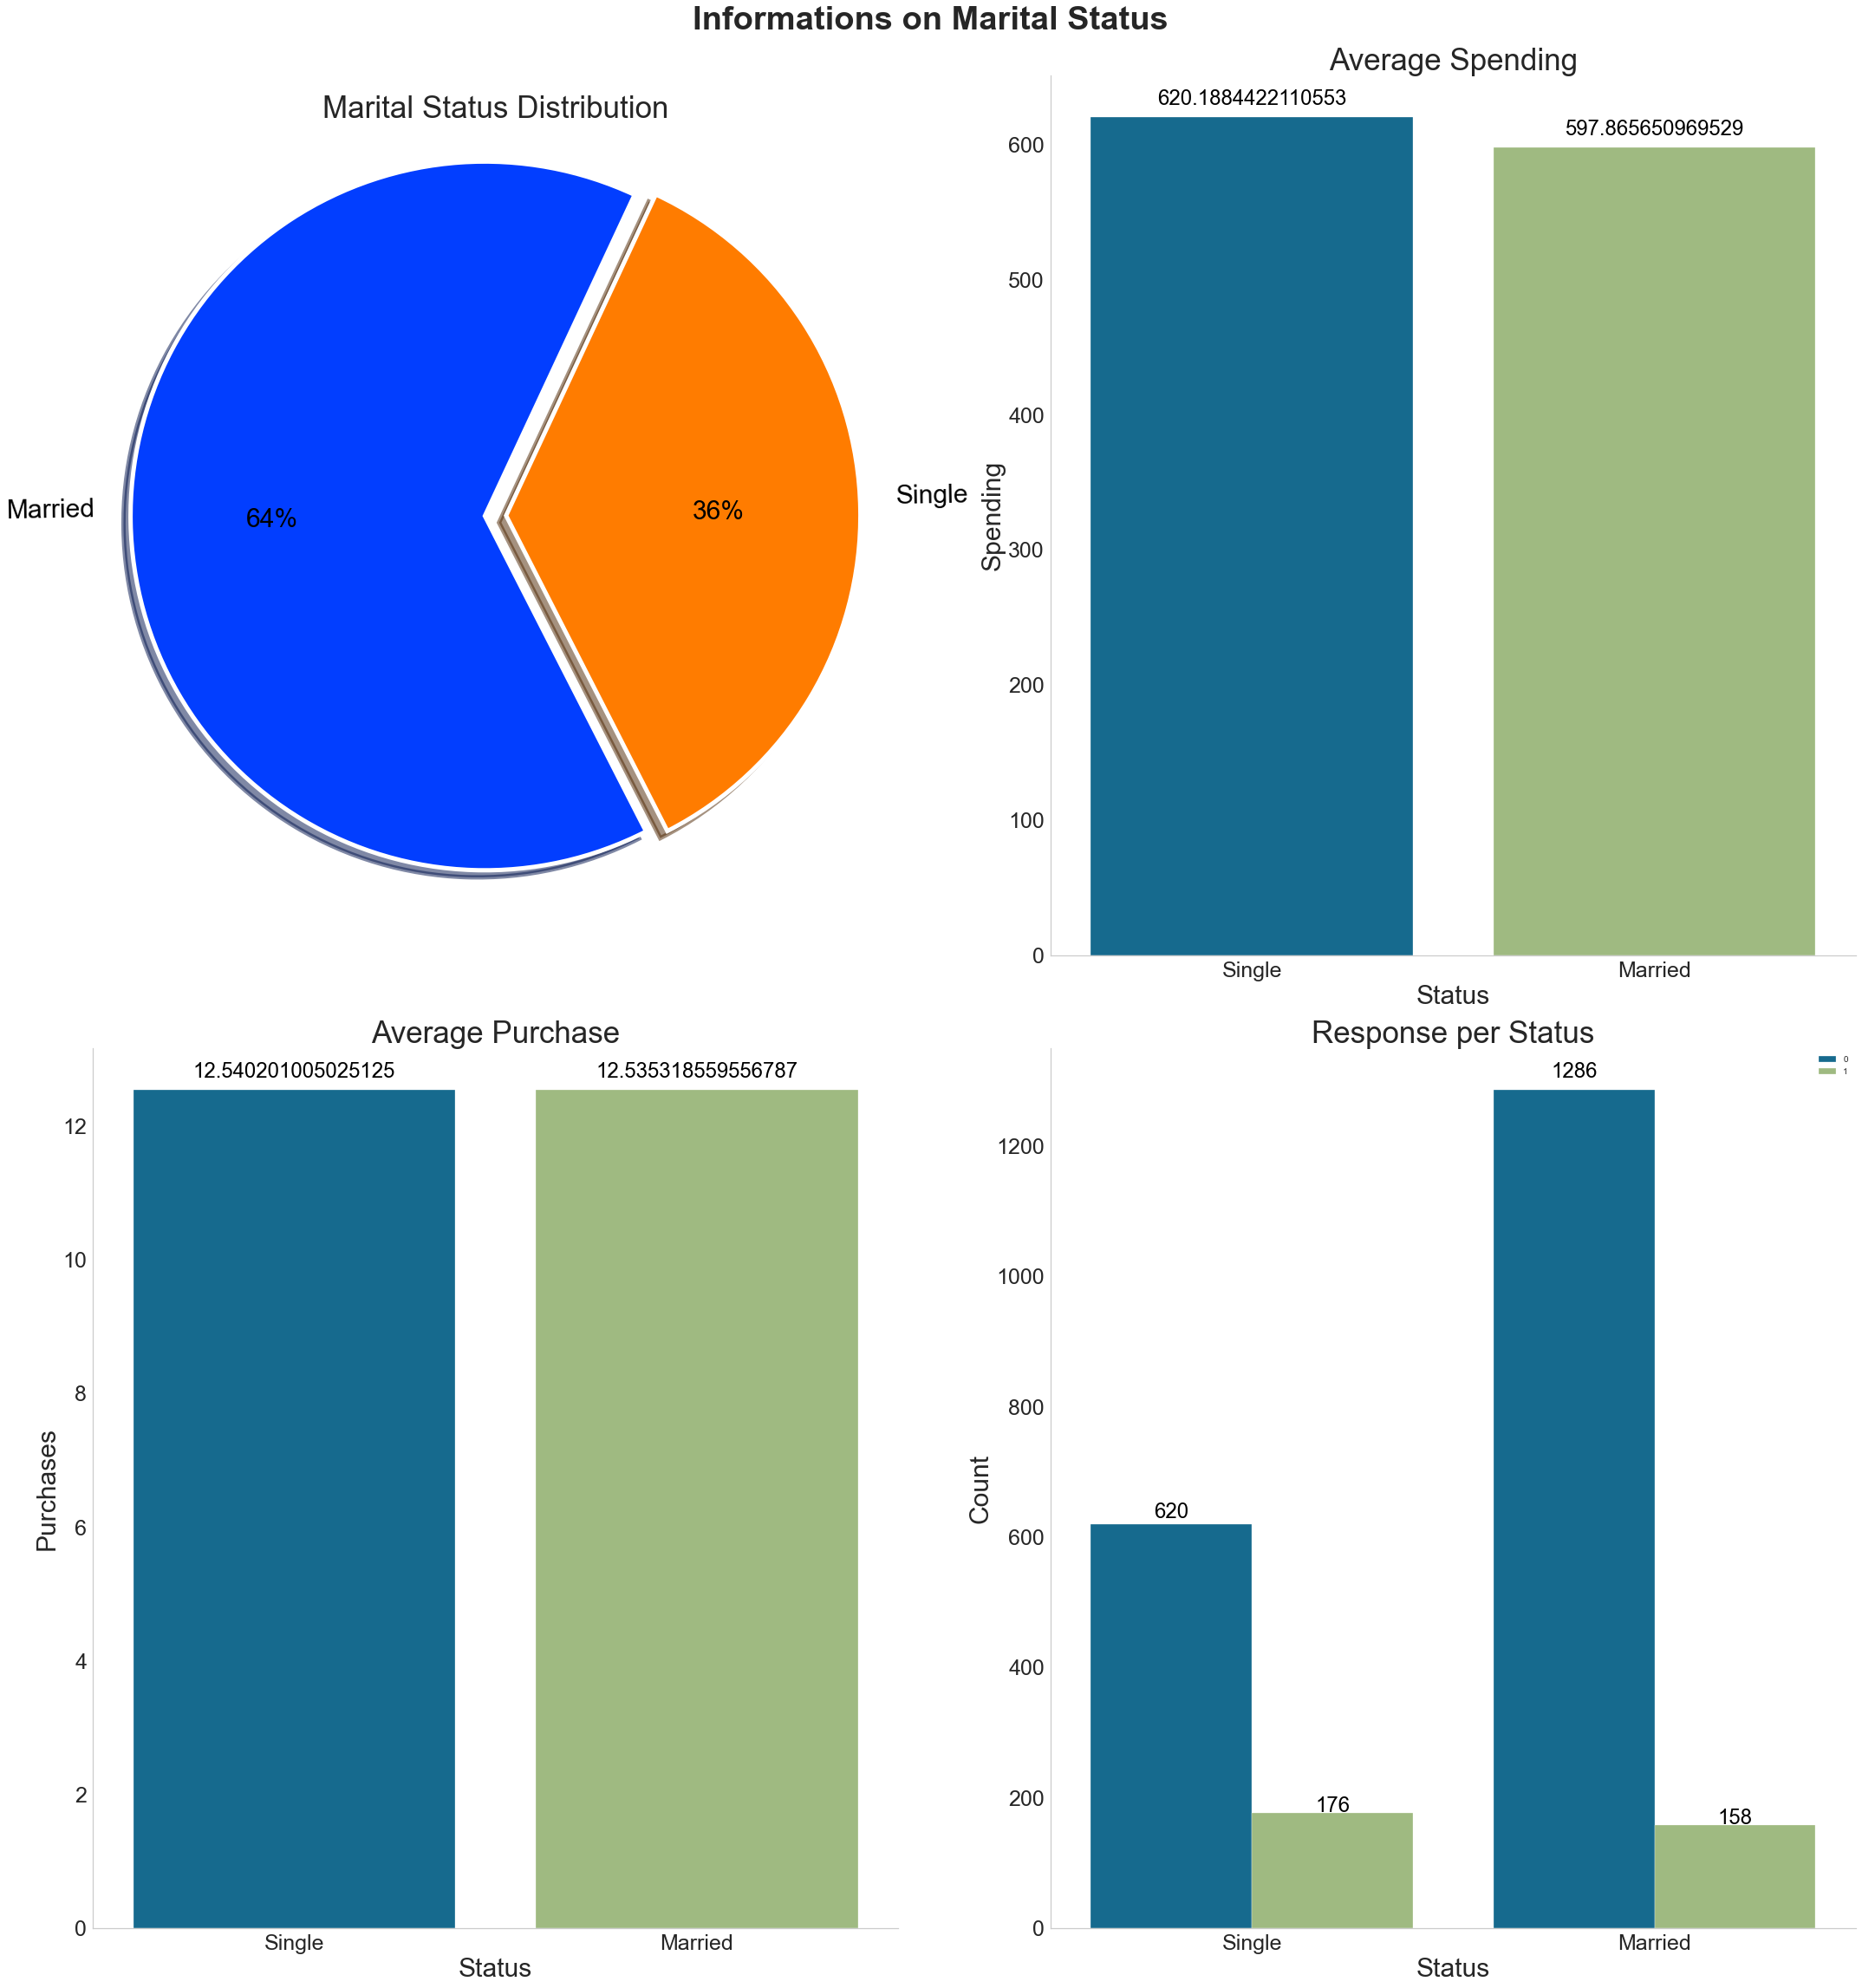

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30,32))
#fig, [[axis1, axis2],[axis3, axis4]] = plt.subplots(2,2,figsize=(30,32))
fig.suptitle("Informations on Marital Status", fontsize=38,fontweight='bold', verticalalignment="bottom")
 
#Plot 1
plt.subplot(2,2,1)
colors = sns.color_palette('bright')
explode = [0.02,0.04]
labels = 'Married','Single'
plt.pie([len(Camp['Marital_Status'][Camp['Marital_Status']=='Married']),len(Camp['Marital_Status'][Camp['Marital_Status']=='Single'])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 65,
            textprops = {'color': 'Black','fontsize':30},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
plt.title('Marital Status Distribution',fontsize=35, fontweight='normal')

#Plot 2
plt.subplot(2,2,2)
Camp_mari = pd.DataFrame(Camp.groupby('Marital_Status', as_index=False)['Total Spend'].mean())
Camp_mari = Camp_mari.sort_values(by='Total Spend', ascending=False)

ax2 = sns.barplot(x='Marital_Status', y='Total Spend',ax=ax2, data=Camp_mari)
for i in ax2.patches:    
    ax2.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 24, rotation = 0, color = 'black')
ax2.set_ylabel('Spending',fontsize=30,fontweight='normal')    
ax2.set_xlabel('Status',fontsize=30,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Average Spending',fontsize=35, fontweight='normal')

#Plot 3
plt.subplot(2,2,3)
Camp_mari2 = pd.DataFrame(Camp.groupby('Marital_Status', as_index=False)['Frequency'].mean())
Camp_mari2 = Camp_mari2.sort_values(by='Frequency', ascending=False)

ax3 = sns.barplot(x='Marital_Status', y='Frequency',ax=ax3, data=Camp_mari2)
for i in ax3.patches:    
    ax3.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 24, rotation = 0, color = 'black')
ax3.set_ylabel('Purchases',fontsize=30,fontweight='normal')    
ax3.set_xlabel('Status',fontsize=30,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Average Purchase',fontsize=35, fontweight='normal')

#Plot 4
plt.subplot(2,2,4)
ax4 = sns.countplot(x='Marital_Status', hue='Response',ax=ax4, data=Camp)
for i in ax4.patches:    
    ax4.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 24, rotation = 0, color = 'black')
ax4.set_ylabel('Count',fontsize=30,fontweight='normal')    
ax4.set_xlabel('Status',fontsize=30,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Response per Status',fontsize=35, fontweight='normal')
ax4.legend(loc='best')

plt.tight_layout()

### `Education`

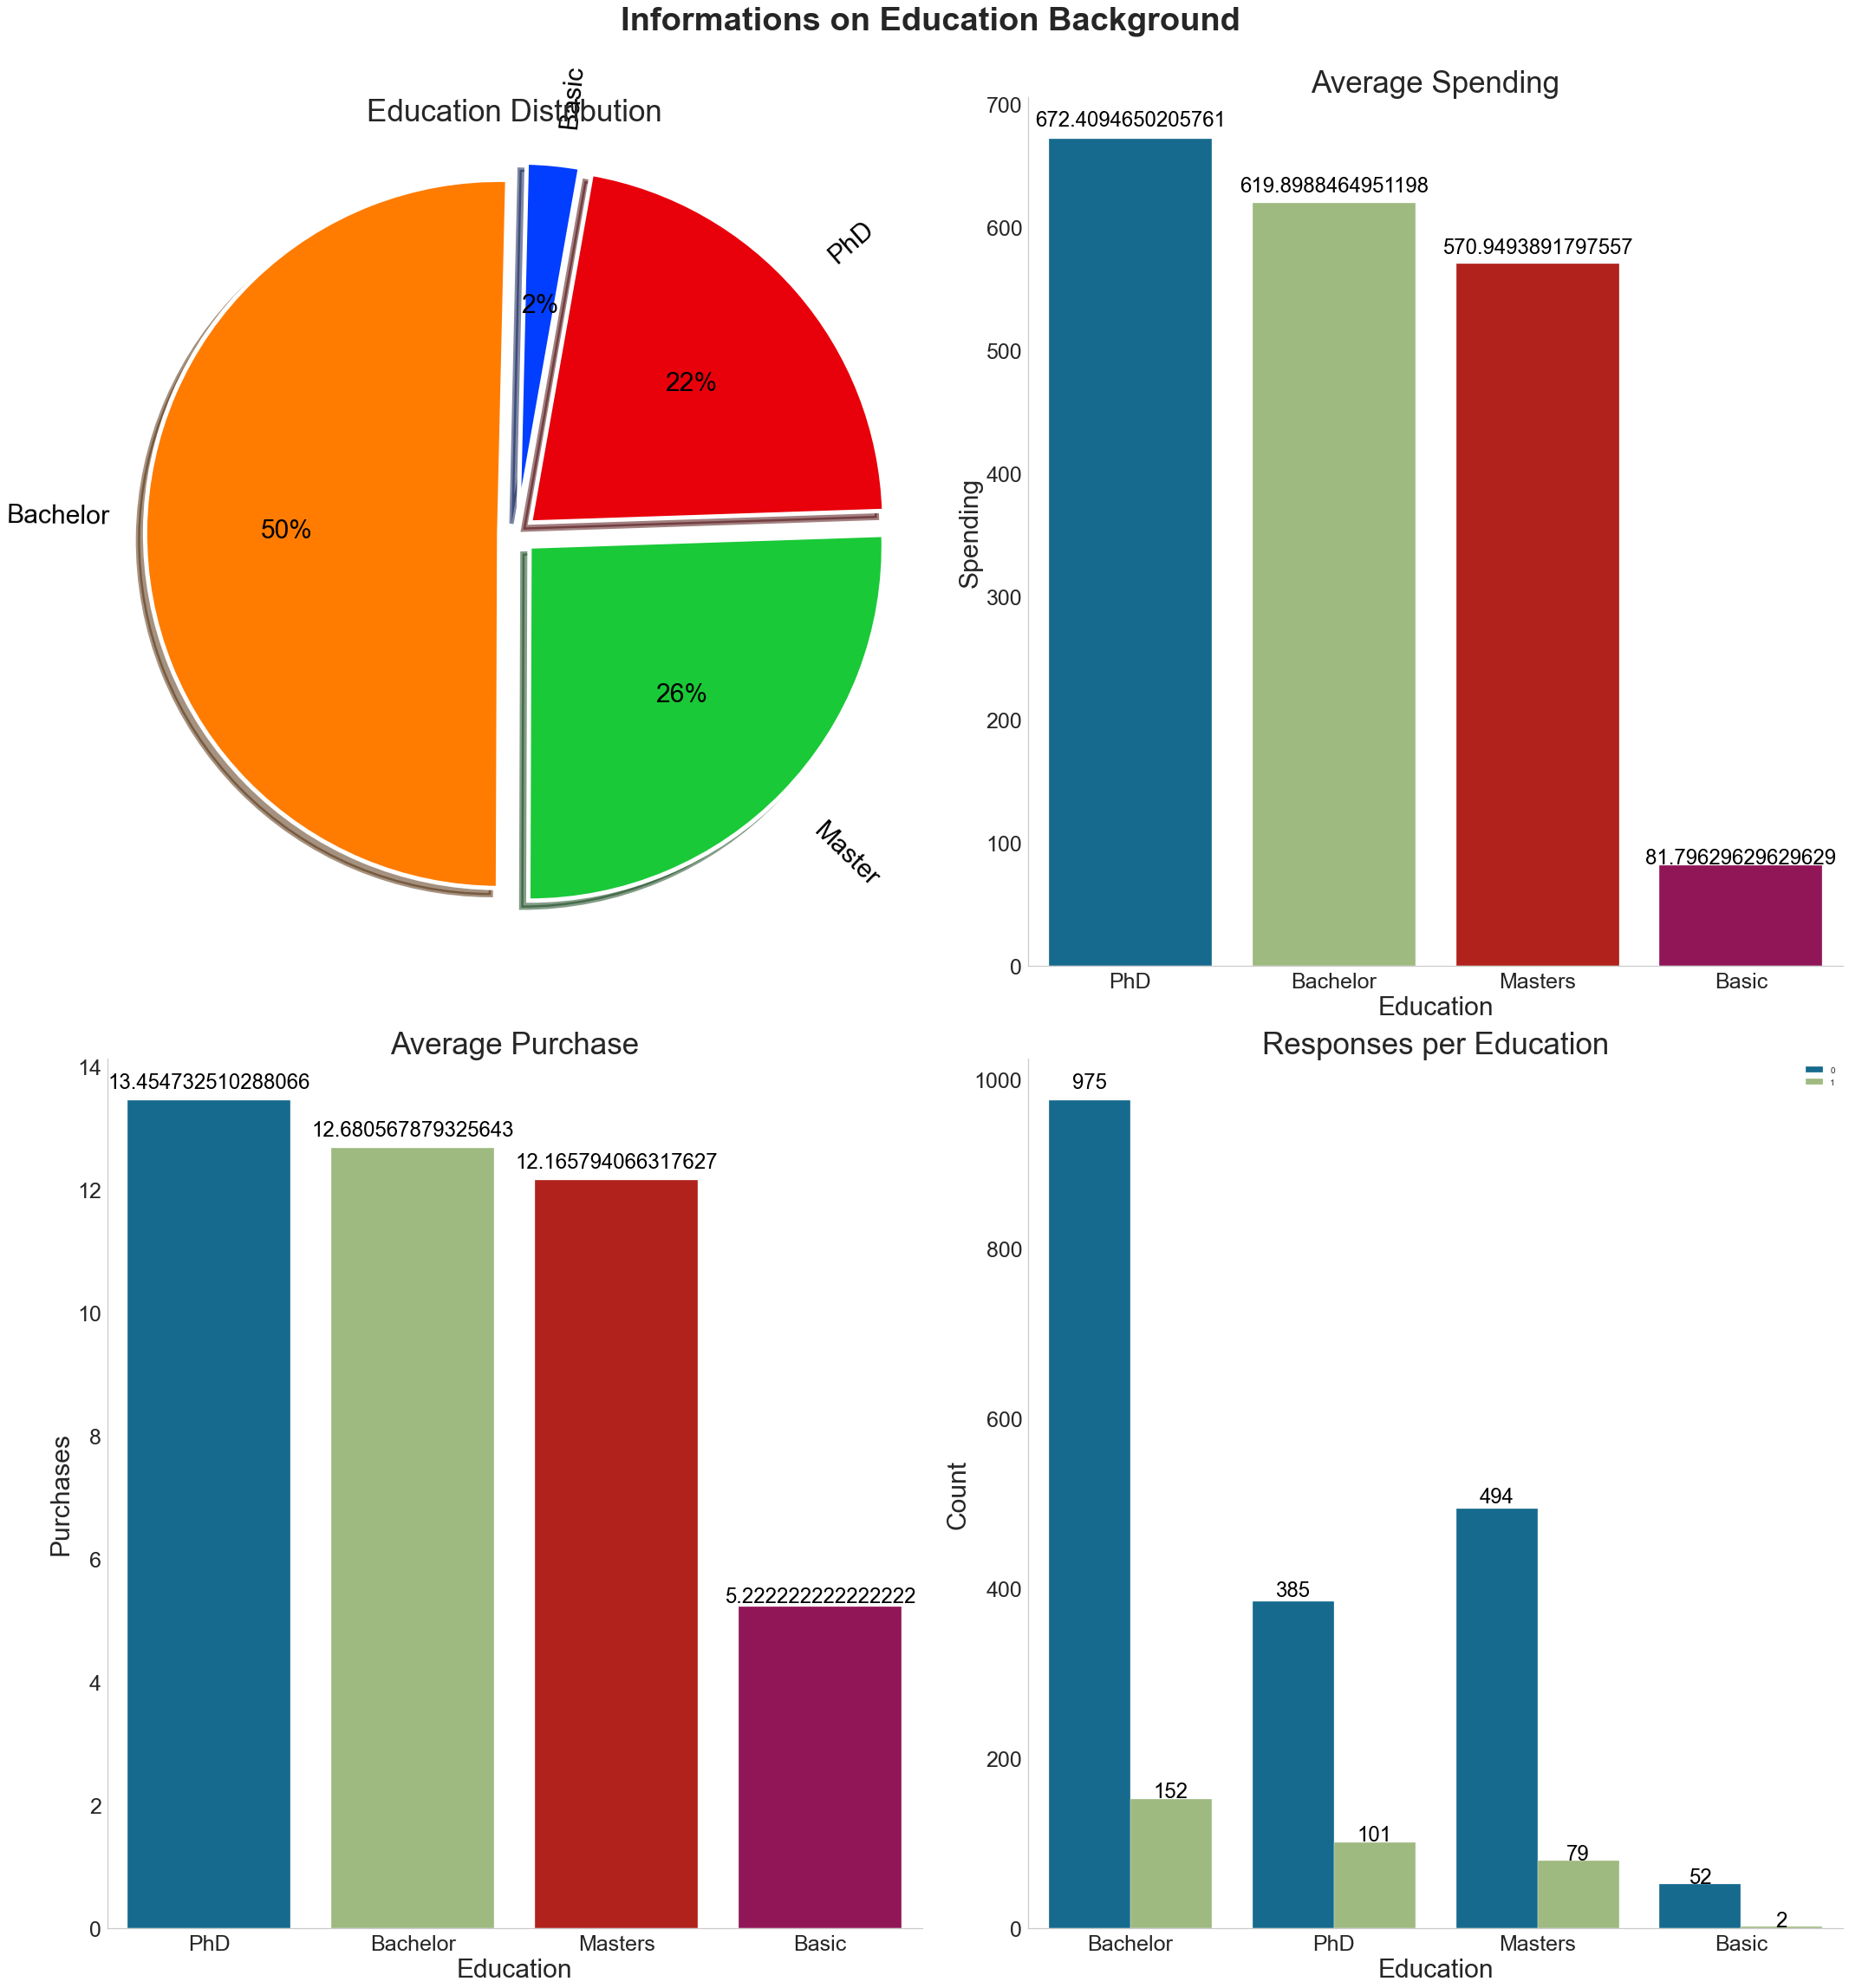

In [166]:
fig, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2,2,figsize=(30,32))
#fig, [[axis1, axis2],[axis3, axis4]] = plt.subplots(2,2,figsize=(30,32))
fig.suptitle("Informations on Education Background", fontsize=38,fontweight='bold', verticalalignment="bottom")
 
#Plot 1
plt.subplot(2,2,1)
colors = sns.color_palette('bright')
explode = [0.05, 0.05, 0.05, 0.05]
labels = 'Basic','Bachelor','Master','PhD'
plt.pie([len(Camp['Education'][Camp['Education']=='Basic']),len(Camp['Education'][Camp['Education']=='Bachelor']),len(Camp['Education'][Camp['Education']=='Masters']),len(Camp['Education'][Camp['Education']=='PhD'])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 80,
            textprops = {'color': 'Black','fontsize':30},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
plt.title('Education Distribution',fontsize=35, fontweight='normal')

#Plot 2
plt.subplot(2,2,2)
Camp_edu = pd.DataFrame(Camp.groupby('Education', as_index=False)['Total Spend'].mean())
Camp_edu = Camp_edu.sort_values(by='Total Spend', ascending=False)

ax6 = sns.barplot(x='Education', y='Total Spend',ax=ax6, data=Camp_edu)
for i in ax6.patches:    
    ax6.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 24, rotation = 0, color = 'black')
ax6.set_ylabel('Spending',fontsize=30,fontweight='normal')    
ax6.set_xlabel('Education',fontsize=30,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_title('Average Spending',fontsize=35, fontweight='normal')

#Plot 3
plt.subplot(2,2,3)
Camp_edu2 = pd.DataFrame(Camp.groupby('Education', as_index=False)['Frequency'].mean())
Camp_edu2 = Camp_edu2.sort_values(by='Frequency', ascending=False)

ax7 = sns.barplot(x='Education', y='Frequency',ax=ax7, data=Camp_edu2)
for i in ax7.patches:    
    ax7.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 24, rotation = 0, color = 'black')
ax7.set_ylabel('Purchases',fontsize=30,fontweight='normal')    
ax7.set_xlabel('Education',fontsize=30,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.set_title('Average Purchase',fontsize=35, fontweight='normal')

#Plot 4
plt.subplot(2,2,4)
ax8 = sns.countplot(x='Education', hue='Response',ax=ax8, data=Camp)
for i in ax8.patches:    
    ax8.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 24, rotation = 0, color = 'black')
ax8.set_ylabel('Count',fontsize=30,fontweight='normal')    
ax8.set_xlabel('Education',fontsize=30,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.set_title('Responses per Education',fontsize=35, fontweight='normal')
ax8.legend(loc='best')

plt.tight_layout()

### `Income`

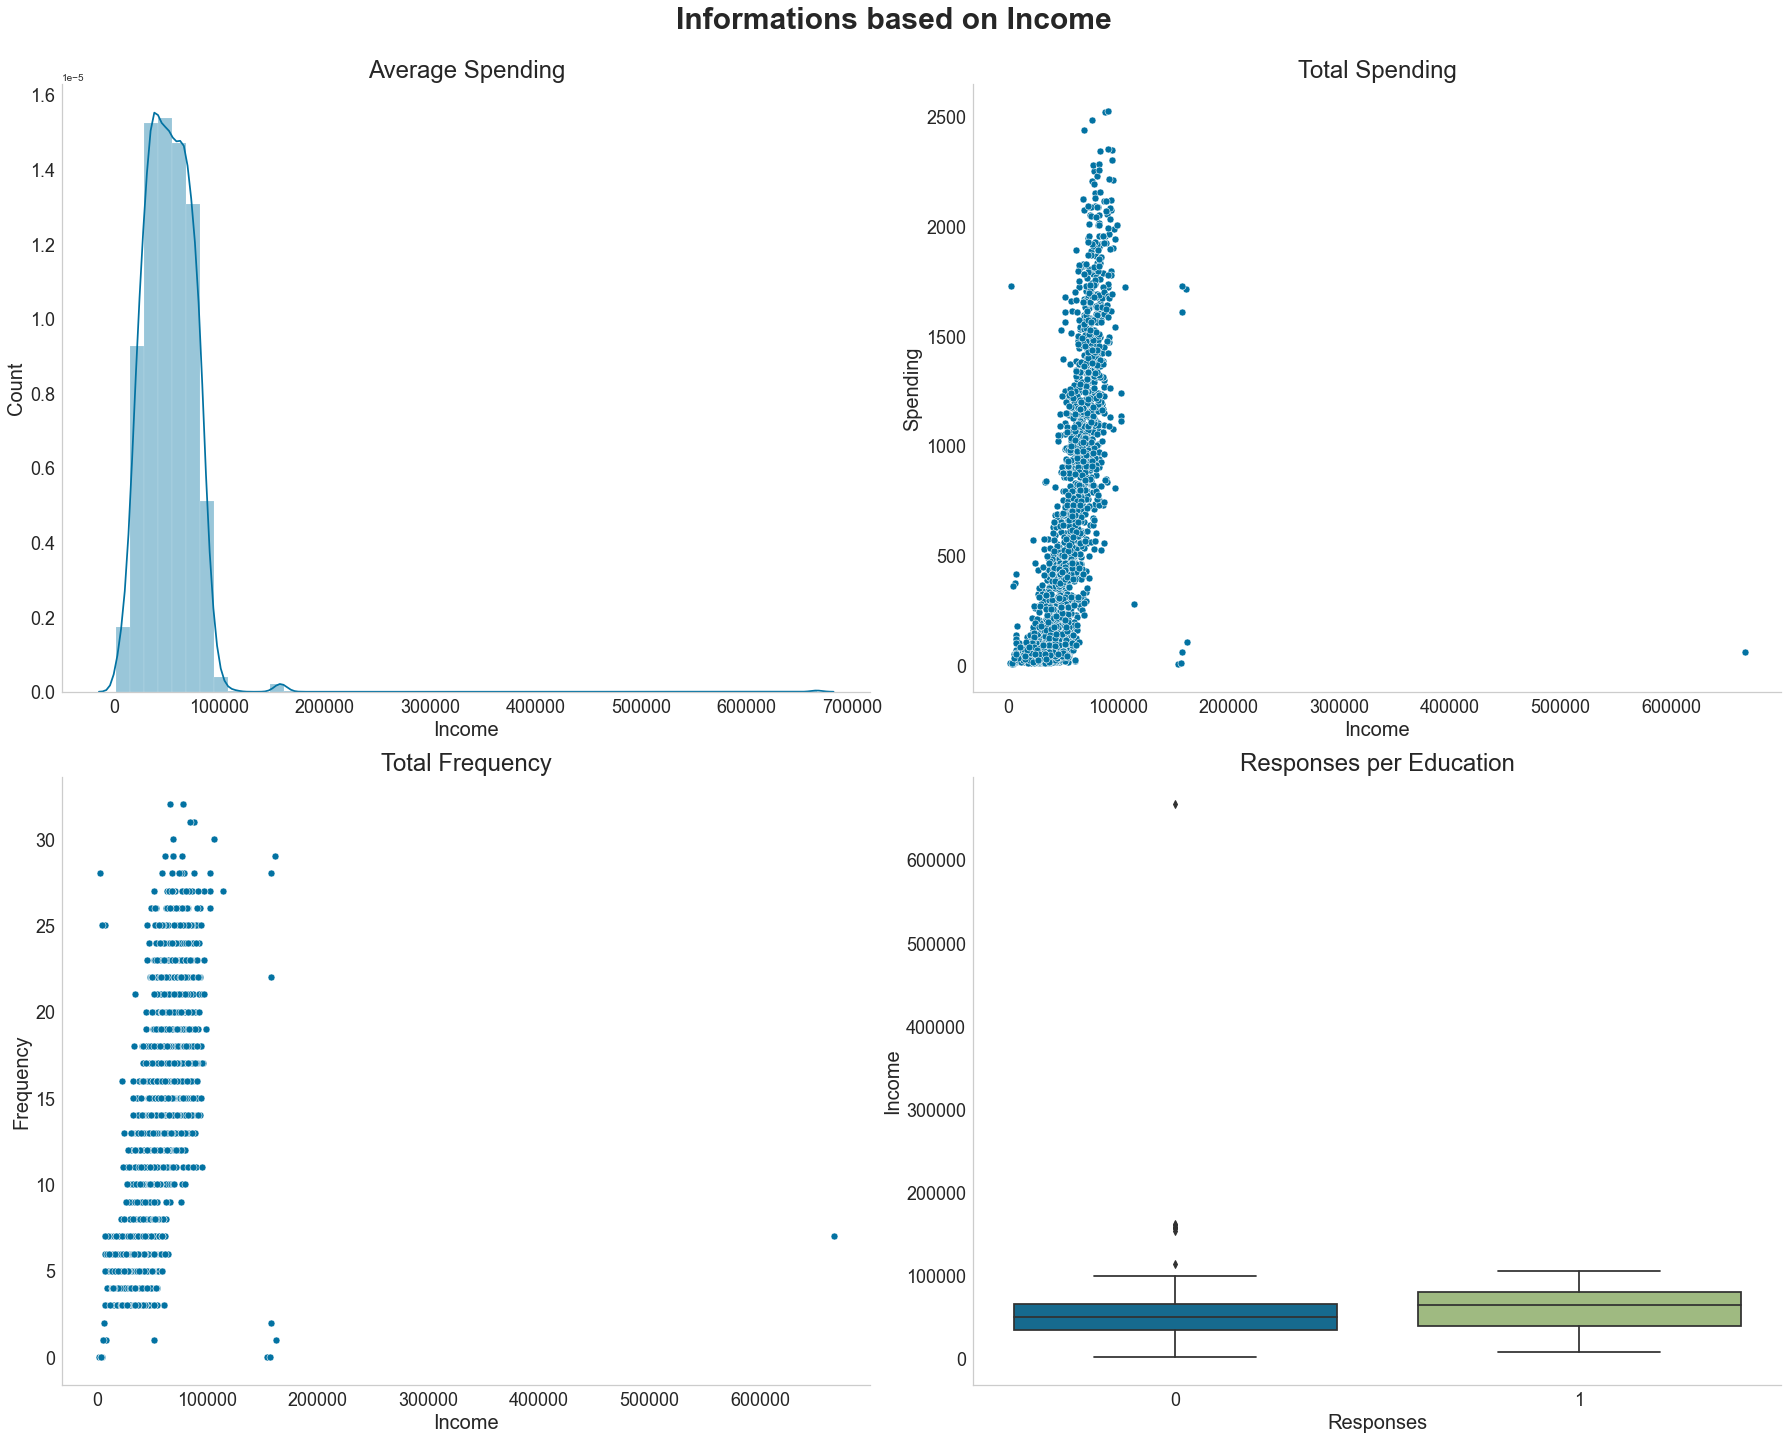

In [189]:
fig, ((ax9, ax10), (ax11, ax12)) = plt.subplots(2,2,figsize=(25,20))
#fig, [[axis1, axis2],[axis3, axis4]] = plt.subplots(2,2,figsize=(30,32))
fig.suptitle("Informations based on Income", fontsize=30,fontweight='bold', verticalalignment="bottom")
 
#Plot 1
plt.subplot(2,2,1)
ax9 = sns.distplot(x = Camp['Income'], kde = True,ax=ax9)
ax9.set_ylabel('Count',fontsize=20,fontweight='normal')    
ax9.set_xlabel('Income',fontsize=20,fontweight='normal') 
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.set_title('Average Spending',fontsize=24, fontweight='normal')

#Plot 2
plt.subplot(2,2,2)
ax10 = sns.scatterplot(x='Income', y='Total Spend',ax=ax10, data=Camp)
ax10.set_ylabel('Spending',fontsize=20,fontweight='normal')    
ax10.set_xlabel('Income',fontsize=20,fontweight='normal') 
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.set_title('Total Spending',fontsize=24, fontweight='normal')

#Plot 3
plt.subplot(2,2,3)
ax11 = sns.scatterplot(x='Income', y='Frequency', ax=ax11, data=Camp)
ax11.set_ylabel('Frequency',fontsize=20,fontweight='normal')    
ax11.set_xlabel('Income',fontsize=20,fontweight='normal') 
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.set_title('Total Frequency',fontsize=24, fontweight='normal')

#Plot 4
plt.subplot(2,2,4)
ax12 = sns.boxplot(x='Response', y='Income',ax=ax12, data=Camp)
ax12.set_ylabel('Income',fontsize=20,fontweight='normal')    
ax12.set_xlabel('Responses',fontsize=20,fontweight='normal') 
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.set_title('Responses per Education',fontsize=24, fontweight='normal')


plt.tight_layout()

### Accepted Campaign

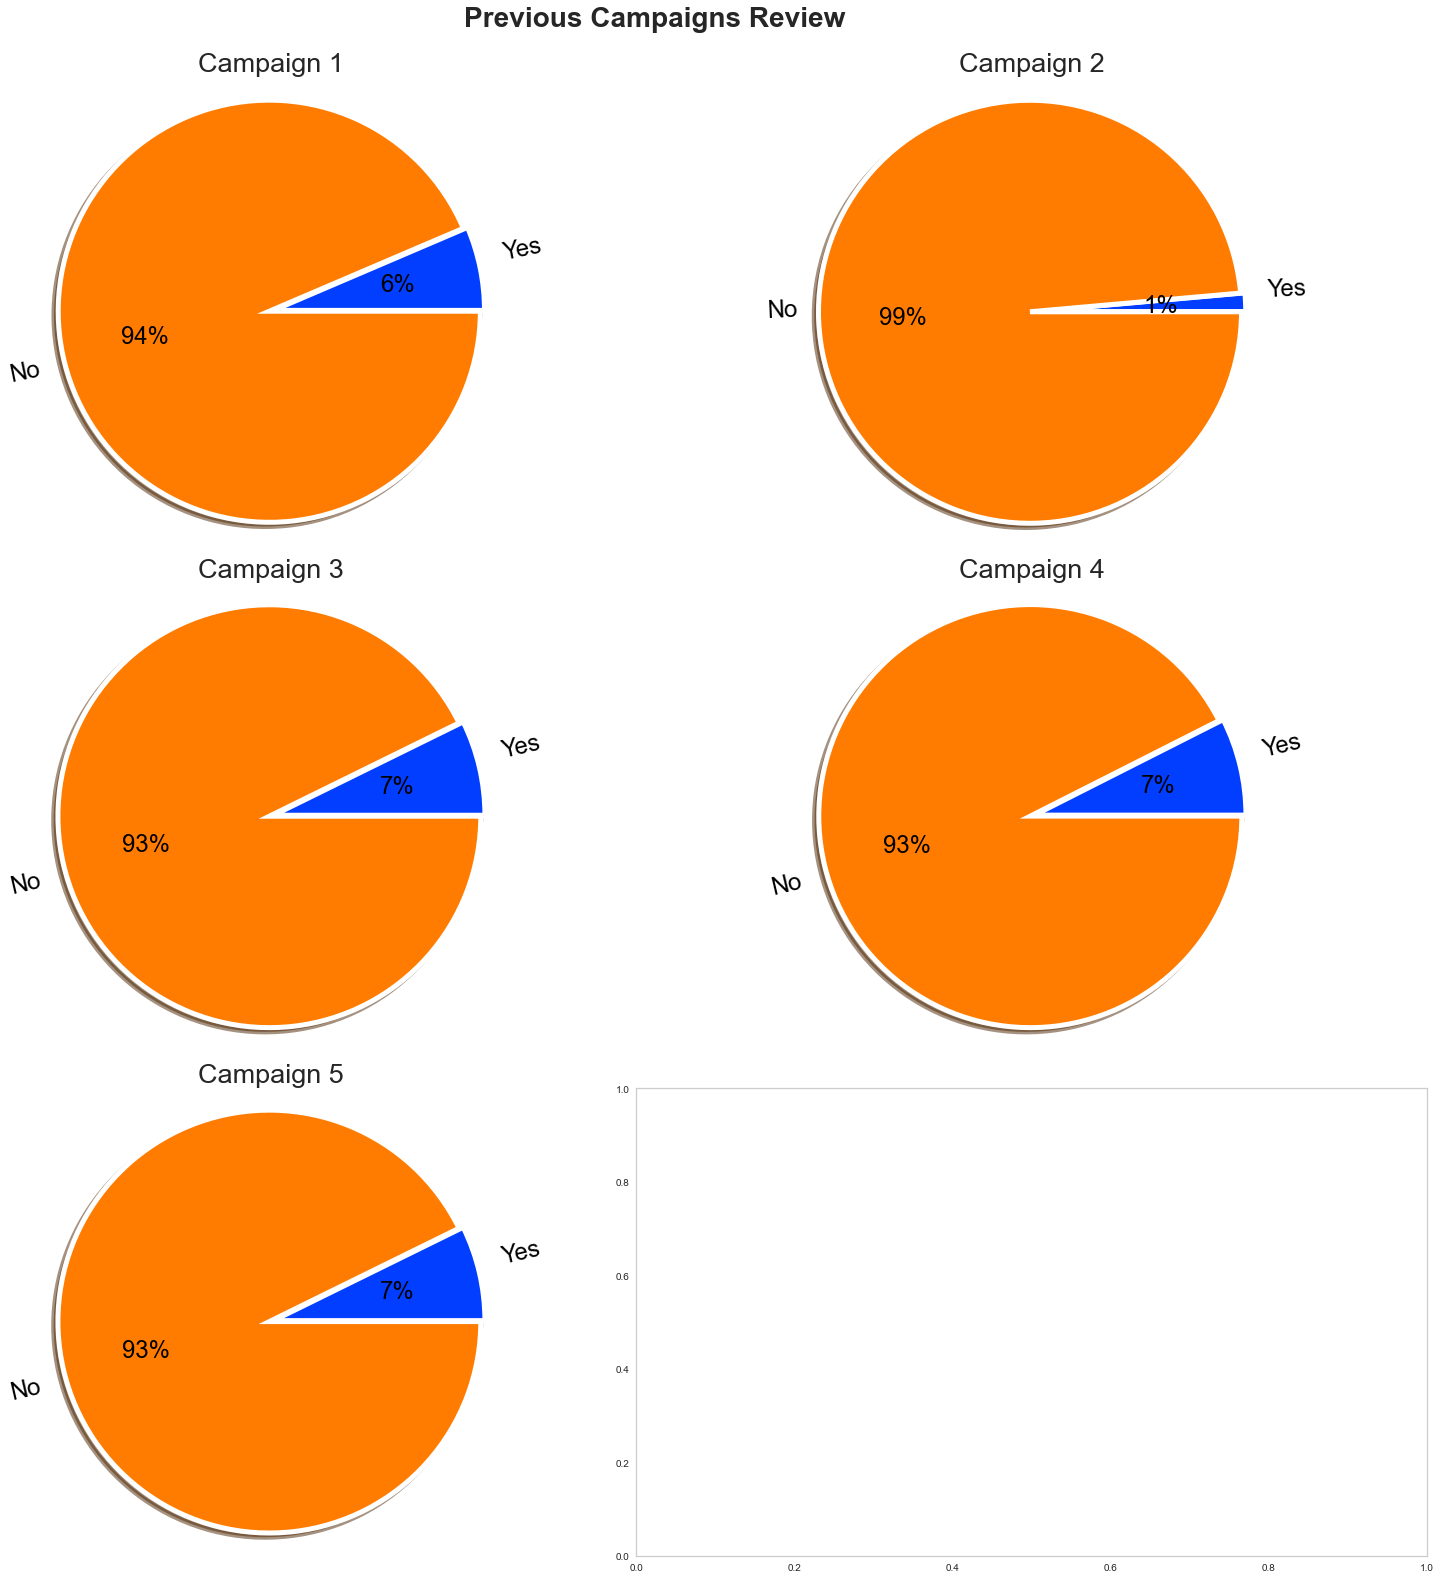

In [211]:
fig, ((ax13, ax14), (ax15, ax16), (ax17)) = plt.subplots(3,2,figsize=(22,22))
fig.suptitle("Previous Campaigns Review", fontsize=28,fontweight='bold', verticalalignment="bottom")
 
#Plot 1
plt.subplot(3,2,1)
colors = sns.color_palette('bright')
explode = [0.01, 0.01]
labels = 'Yes','No'
plt.pie([len(Camp['AcceptedCmp1'][Camp['AcceptedCmp1'] == 1]),len(Camp['AcceptedCmp1'][Camp['AcceptedCmp1'] == 0])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 0,
            textprops = {'color': 'Black','fontsize':24},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
plt.title('Campaign 1',fontsize=27, fontweight='normal')

# Plot 2
plt.subplot(3,2,2)
plt.pie([len(Camp['AcceptedCmp2'][Camp['AcceptedCmp2'] == 1]),len(Camp['AcceptedCmp2'][Camp['AcceptedCmp1'] == 0])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 0,
            textprops = {'color': 'Black','fontsize':24},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
plt.title('Campaign 2',fontsize=27, fontweight='normal')

# Plot 3
plt.subplot(3,2,3)
plt.pie([len(Camp['AcceptedCmp3'][Camp['AcceptedCmp3'] == 1]),len(Camp['AcceptedCmp3'][Camp['AcceptedCmp3'] == 0])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 0,
            textprops = {'color': 'Black','fontsize':24},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
plt.title('Campaign 3',fontsize=27, fontweight='normal')

# Plot 4
plt.subplot(3,2,4)
labels = 'Yes','No'
plt.pie([len(Camp['AcceptedCmp4'][Camp['AcceptedCmp4'] == 1]),len(Camp['AcceptedCmp4'][Camp['AcceptedCmp4'] == 0])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 0,
            textprops = {'color': 'Black','fontsize':24},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
plt.title('Campaign 4',fontsize=27, fontweight='normal')

# Plot 5
plt.subplot(3,2,5)
labels = 'Yes','No'
plt.pie([len(Camp['AcceptedCmp5'][Camp['AcceptedCmp5'] == 1]),len(Camp['AcceptedCmp5'][Camp['AcceptedCmp5'] == 0])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 0,
            textprops = {'color': 'Black','fontsize':24},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
plt.title('Campaign 5',fontsize=27, fontweight='normal')

# plot 6


plt.tight_layout()

### Machine Learning Model with Pycaret

### Pre processing Pycaret

In [213]:
# Preprocessing 
grid = setup(data=Camp , target= 'Response', data_split_shuffle= True, data_split_stratify= True, session_id= 50,normalize = True,
             normalize_method = 'robust', ignore_low_variance = True,ignore_features = ['ID','Dt_Customer'],
             fix_imbalance = False, remove_outliers = False) 

,Description,Value
0,session_id,50
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2240, 21)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing Models Performace

In [243]:
## Evaluate and compare models
best = compare_models(n_select = 3, sort = 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8864,0.8615,0.4014,0.7132,0.5032,0.4467,0.4743,0.5900
gbc,Gradient Boosting Classifier,0.8819,0.8608,0.4054,0.6833,0.5028,0.4413,0.4636,0.0600
lda,Linear Discriminant Analysis,0.8768,0.8575,0.4442,0.6221,0.5111,0.4441,0.4558,0.0060
rf,Random Forest Classifier,0.8794,0.8537,0.3375,0.6992,0.4521,0.3942,0.4286,0.0740
lightgbm,Light Gradient Boosting Machine,0.8807,0.8410,0.4226,0.6530,0.5097,0.4462,0.4614,0.0220
ada,Ada Boost Classifier,0.8806,0.8349,0.4400,0.6476,0.5172,0.4531,0.4674,0.0320
et,Extra Trees Classifier,0.8724,0.8197,0.3379,0.6329,0.4369,0.3735,0.3983,0.0630
knn,K Neighbors Classifier,0.8647,0.7144,0.2219,0.6295,0.3223,0.2682,0.3150,0.1470
dt,Decision Tree Classifier,0.8315,0.6634,0.4103,0.4377,0.4186,0.3213,0.3241,0.0050
nb,Naive Bayes,0.1831,0.5224,0.9873,0.1532,0.2652,0.0090,0.0555,0.0030


### Creating Models

### LGBM

In [245]:
LGBM = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8662,0.8650,0.5000,0.5714,0.5333,0.4557,0.4571
1,0.8854,0.8904,0.4167,0.7143,0.5263,0.4662,0.4881
2,0.8535,0.8155,0.3750,0.5294,0.4390,0.3576,0.3646
3,0.9045,0.8484,0.5000,0.8000,0.6154,0.5641,0.5845
4,0.9172,0.9082,0.5652,0.8125,0.6667,0.6211,0.6345
5,0.8535,0.8037,0.2609,0.5000,0.3429,0.2695,0.2876
6,0.8599,0.7393,0.2609,0.5455,0.3529,0.2852,0.3097
7,0.8782,0.8171,0.3913,0.6429,0.4865,0.4220,0.4388
8,0.8846,0.8230,0.3913,0.6923,0.5000,0.4404,0.4634


In [246]:
print(LGBM)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Gradient Boosting Classifier

In [247]:
GBC = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8726,0.9110,0.4583,0.6111,0.5238,0.4520,0.4582
1,0.9045,0.9023,0.4583,0.8462,0.5946,0.5458,0.5789
2,0.8662,0.8192,0.3750,0.6000,0.4615,0.3898,0.4038
3,0.9108,0.8719,0.4583,0.9167,0.6111,0.5670,0.6106
4,0.8981,0.9192,0.4783,0.7333,0.5789,0.5239,0.5394
5,0.8790,0.8209,0.2609,0.7500,0.3871,0.3370,0.3955
6,0.8726,0.7941,0.3478,0.6154,0.4444,0.3787,0.3984
7,0.8590,0.8086,0.3043,0.5385,0.3889,0.3161,0.3325
8,0.8654,0.8521,0.3478,0.5714,0.4324,0.3612,0.3755


In [248]:
print(GBC)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=50, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Random Forest

In [249]:
RF = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8854,0.8947,0.4583,0.6875,0.5500,0.4873,0.5005
1,0.8790,0.9074,0.3333,0.7273,0.4571,0.3994,0.4381
2,0.8662,0.7835,0.2917,0.6364,0.4000,0.3362,0.3688
3,0.8790,0.8354,0.2917,0.7778,0.4242,0.3719,0.4282
4,0.8981,0.8911,0.3913,0.8182,0.5294,0.4801,0.5214
5,0.8854,0.8569,0.3043,0.7778,0.4375,0.3870,0.4402
6,0.8599,0.7836,0.2609,0.5455,0.3529,0.2852,0.3097
7,0.8654,0.8241,0.2609,0.6000,0.3636,0.3012,0.3341
8,0.8718,0.8388,0.3043,0.6364,0.4118,0.3497,0.3798


In [250]:
print(RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)


### Hyperparameter Tuning

### LGBM

In [251]:
tuned_LGBM = tune_model(LGBM, optimize = 'auc', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8854,0.9054,0.2917,0.8750,0.4375,0.3909,0.4650
1,0.8790,0.8816,0.2917,0.7778,0.4242,0.3719,0.4282
2,0.8471,0.8264,0.0833,0.5000,0.1429,0.1037,0.1560
3,0.8854,0.8744,0.2917,0.8750,0.4375,0.3909,0.4650
4,0.8981,0.9182,0.3478,0.8889,0.5000,0.4551,0.5177
5,0.8662,0.8452,0.1304,0.7500,0.2222,0.1869,0.2760
6,0.8726,0.7633,0.1304,1.0000,0.2308,0.2039,0.3369
7,0.8462,0.7841,0.1739,0.4444,0.2500,0.1822,0.2073
8,0.8846,0.8671,0.3043,0.7778,0.4375,0.3866,0.4399


### Gradient Boosting Classifier

In [252]:
tuned_GBC = tune_model(GBC, optimize = 'auc', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9108,0.9023,0.4583,0.9167,0.6111,0.5670,0.6106
1,0.8790,0.8925,0.3750,0.6923,0.4865,0.4247,0.4504
2,0.8471,0.8230,0.0833,0.5000,0.1429,0.1037,0.1560
3,0.8917,0.8409,0.4583,0.7333,0.5641,0.5060,0.5243
4,0.8981,0.9117,0.4348,0.7692,0.5556,0.5030,0.5291
5,0.8854,0.8507,0.2609,0.8571,0.4000,0.3560,0.4342
6,0.8726,0.7967,0.2174,0.7143,0.3333,0.2844,0.3469
7,0.8654,0.8125,0.2609,0.6000,0.3636,0.3012,0.3341
8,0.8974,0.8668,0.3478,0.8889,0.5000,0.4548,0.5175


### Random Forest

In [253]:
tuned_RF = tune_model(RF, optimize = 'auc', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8280,0.8791,0.7083,0.4595,0.5574,0.4566,0.4731
1,0.8471,0.8603,0.7083,0.5000,0.5862,0.4959,0.5072
2,0.7771,0.7813,0.5833,0.3590,0.4444,0.3148,0.3293
3,0.8726,0.8769,0.7083,0.5667,0.6296,0.5539,0.5589
4,0.8662,0.9160,0.8261,0.5278,0.6441,0.5666,0.5881
5,0.8535,0.8459,0.5217,0.5000,0.5106,0.4245,0.4247
6,0.8217,0.7516,0.4783,0.4074,0.4400,0.3347,0.3363
7,0.7756,0.7628,0.5217,0.3333,0.4068,0.2766,0.2872
8,0.8269,0.8285,0.5652,0.4333,0.4906,0.3885,0.3935


### Model Interpretation

### LGBM

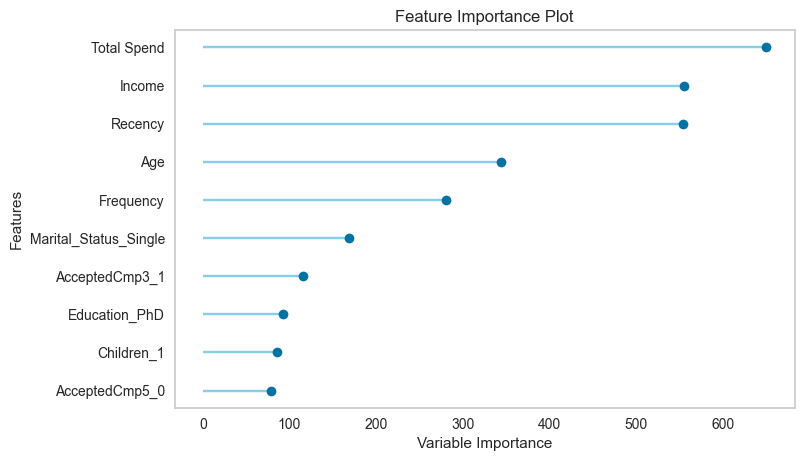

In [254]:
from pycaret.utils import check_metric

# Display feature and their importance
plot_model(tuned_LGBM, plot = 'feature')

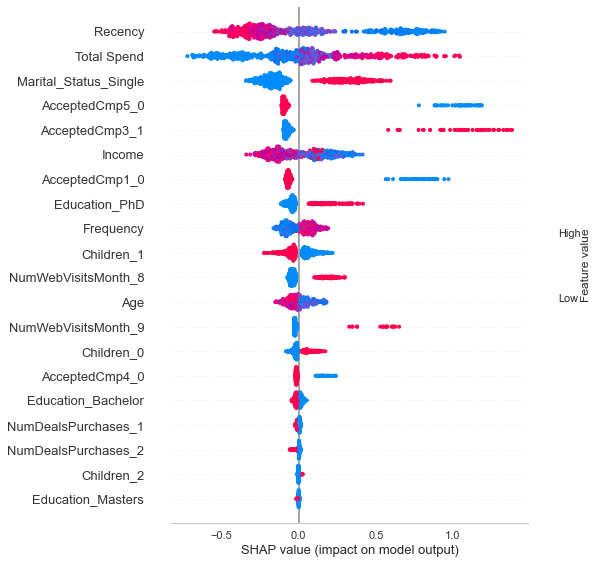

In [255]:
# Shap Model Interpretation Final Model
interpret_model(tuned_LGBM)

### Gradient Boosting Classifier

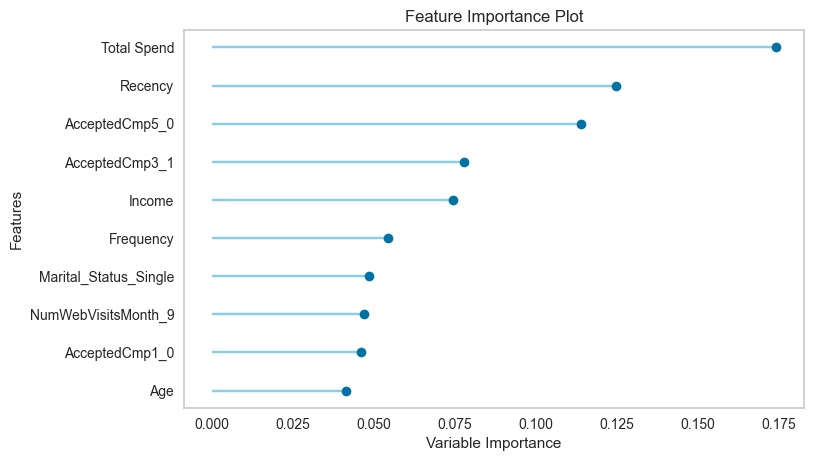

In [226]:
# Display feature and their importance
plot_model(tuned_GBC, plot = 'feature')

### Random Forest

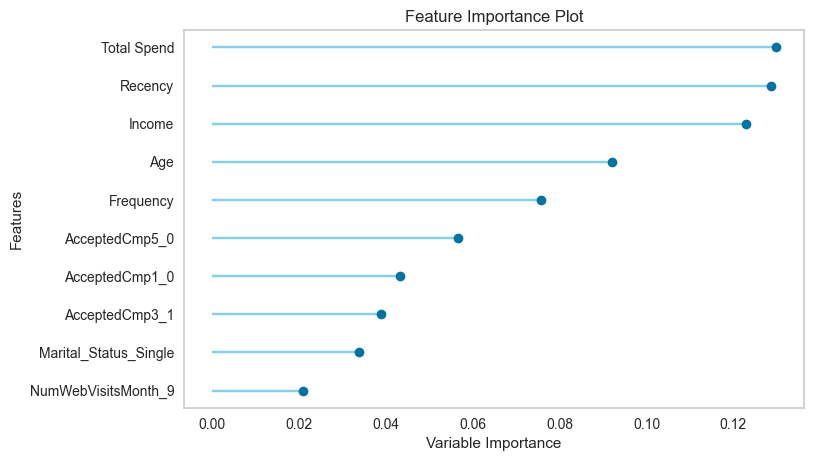

In [256]:
# Display feature and their importance
plot_model(tuned_RF, plot = 'feature')

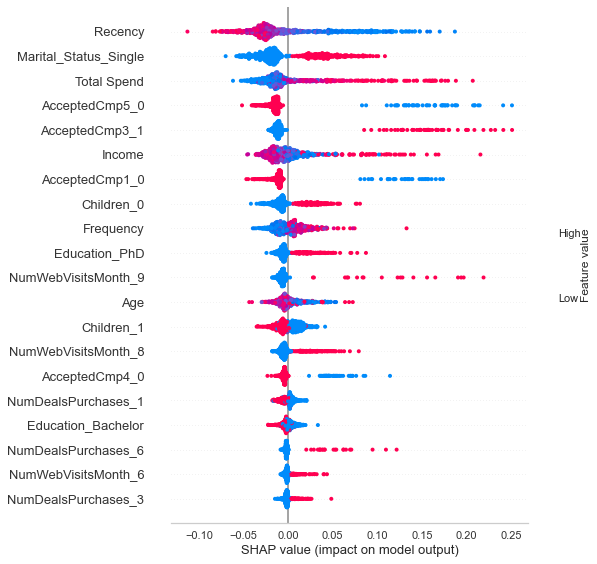

In [257]:
# Shap Model Interpretation Final Model
interpret_model(tuned_RF)

### Choosing The Best Model

In [258]:
print(tuned_LGBM)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=190, n_jobs=-1, num_leaves=70, objective=None,
               random_state=50, reg_alpha=0.1, reg_lambda=0.0001, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Predicting Model on Test / Hold Out Sample

In [259]:
predict_model(tuned_LGBM)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8633,0.8739,0.1800,0.6429,0.2812,0.2313,0.2895


,Income,Recency,Age,Total Spend,Frequency,NumDealsPurchases_0,NumDealsPurchases_1,NumDealsPurchases_10,NumDealsPurchases_11,NumDealsPurchases_12,...,Education_Masters,Education_PhD,Marital_Status_Single,Children_0,Children_1,Children_2,Children_3,Response,Label,Score
0,-1.110167,-0.989691,-0.736842,-0.345041,-0.666667,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.7981
1,0.702696,-0.577320,-0.052632,1.111570,0.750000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.6688
2,-0.711223,0.824742,0.157895,-0.359504,-0.583333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9645
3,0.525391,-0.948454,0.052632,0.729339,0.250000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8016
4,0.928371,-0.969072,0.421053,1.242769,0.083333,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.5093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,-0.844862,-0.742268,0.684211,-0.314050,-0.500000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8759
669,-0.424221,-0.721649,-0.157895,-0.348141,-0.583333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9119
670,1.069019,0.350515,1.000000,1.258264,0.416667,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9032
671,-0.212080,0.453608,-0.210526,-0.179752,-0.250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9584


### AUC Plot

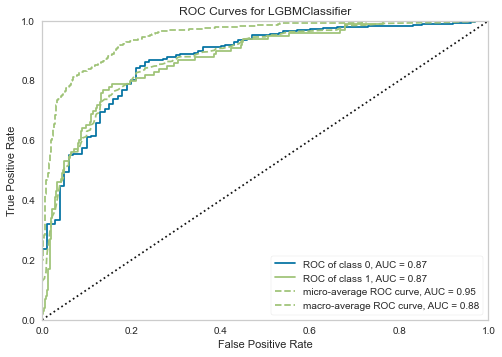

In [260]:
plot_model(tuned_LGBM, plot = 'auc')

### Classification Reports

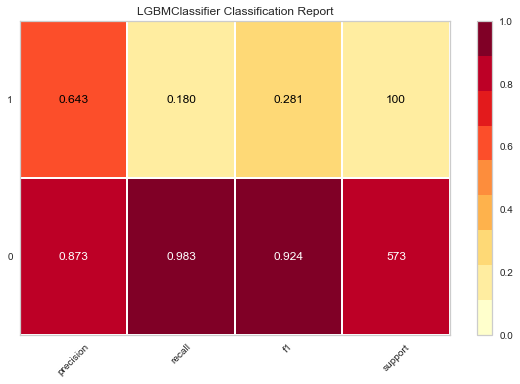

In [261]:
# Plotting the classification report
plot_model(tuned_LGBM,plot='class_report')

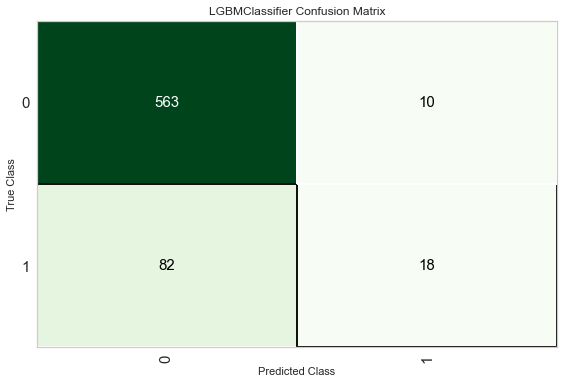

In [262]:
# Plotting the confusion matrix
plot_model(tuned_LGBM,plot='confusion_matrix')

### Finalize Model

In [263]:
final_model = finalize_model(tuned_LGBM)
print(final_model)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=190, n_jobs=-1, num_leaves=70, objective=None,
               random_state=50, reg_alpha=0.1, reg_lambda=0.0001, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Predict on Unseen Data

In [264]:
# New Unseen Data
new_data = Camp.copy()
unseen_predictions = predict_model(final_model, data=new_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8893,0.9381,0.2964,0.8839,0.4439,0.3989,0.4733


,ID,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Response,Education,Marital_Status,Dt_Customer,Age,Total Spend,Frequency,Children,Label,Score
0,5524,58138,58,3,7,0,0,0,0,0,...,1,Bachelor,Single,2012-09-04,65,1617,22,0,0,0.6440
1,2174,46344,38,2,5,0,0,0,0,0,...,0,Bachelor,Single,2014-03-08,68,27,4,2,0,0.9565
2,4141,71613,26,1,4,0,0,0,0,0,...,0,Bachelor,Married,2013-08-21,57,776,20,0,0,0.9493
3,6182,26646,26,2,6,0,0,0,0,0,...,0,Bachelor,Married,2014-02-10,38,53,6,1,0,0.9402
4,5324,58293,94,5,5,0,0,0,0,0,...,0,PhD,Married,2014-01-19,41,422,14,1,0,0.9449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223,46,2,5,0,0,0,0,0,...,0,Bachelor,Married,2013-06-13,55,1341,16,1,0,0.9339
2236,4001,64014,56,7,7,0,0,0,1,0,...,0,PhD,Married,2014-06-10,76,444,15,3,0,0.8451
2237,7270,56981,91,1,6,0,1,0,0,0,...,0,Bachelor,Single,2014-01-25,41,1241,18,0,0,0.8781
2238,8235,69245,8,2,3,0,0,0,0,0,...,0,Masters,Married,2014-01-24,66,843,21,1,0,0.9306
